# Distributions
This notebook shows example usage of the different distributions available with `libsia`.

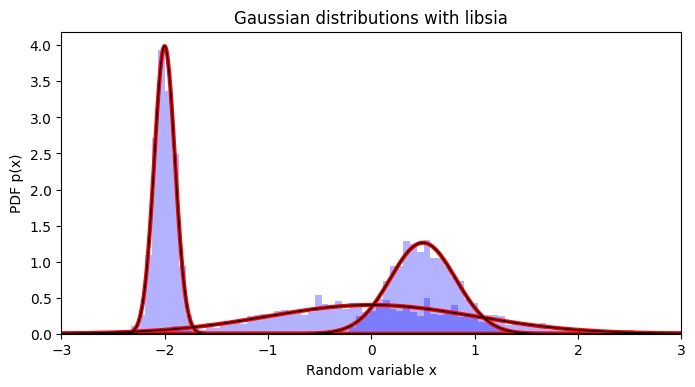

In [2]:
# This example shows use of the Gaussian distribution
%matplotlib inline

import pysia as sia
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

# Define several Gaussian distributions
gaussians = [
    sia.Gaussian(-2.0, 0.01),
    sia.Gaussian(0, 1.0),
    sia.Gaussian(0.5, 0.1)
]

n = 1001
x = np.linspace(-3, 3, n)
p = np.zeros((n, 3))
s = np.zeros((n, 3))
p_scipy = np.zeros((n, 3))
for i in range(len(gaussians)):
    for j in range(n):
        # Evaluate the pdf (probability density) of the Gaussian along x
        p[j, i] = np.exp(gaussians[i].logProb(np.array([x[j]])))
        
        # Generate a sample from the Gaussian
        s[j, i] = gaussians[i].sample()[0]
        
    # Evaluate the pdf using the scipy library to show consistency with the scipy package
    p_scipy[:, i] = multivariate_normal.pdf(x, mean=gaussians[i].mean()[0], cov=gaussians[i].covariance()[0])

# Plot the results
fig = plt.figure(figsize=(8, 4), dpi=100)
plt.hist(s, 100, facecolor='b', density=True, alpha=0.3, histtype='stepfilled')
plt.plot(x, p, 'r', lw=3)
plt.plot(x, p_scipy, 'k', lw=1)
plt.ylabel('PDF p(x)')
plt.xlabel('Random variable x')
plt.xlim([-3, 3])
plt.title('Gaussian distributions with libsia');

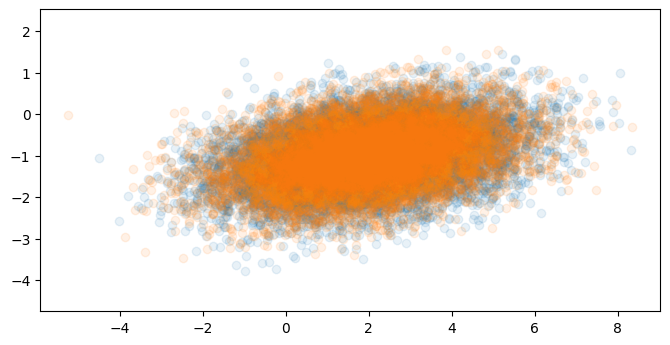

In [3]:
ns = 10000

mu = np.array([2.0, -1.0])
sigma = np.array([[3.0, 0.4], [0.4, 0.5]])
rv0 = multivariate_normal.rvs(mean=mu, cov=sigma, size=ns)

gaussian = sia.Gaussian(mean=mu, covariance=sigma)
rv1 = np.zeros((ns, 2))
for k in range(ns):
    rv1[k,:] = gaussian.sample()

fig = plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(rv1[:,0], rv1[:,1], alpha=0.1)
plt.scatter(rv0[:,0], rv0[:,1], alpha=0.1)
plt.axis('equal');